# Final Project: Analysis of International Soccer results

Dataset from https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017

I'm a big soccer fan so I wanted to use the skills I learned in this course to do some interesting data analysis and classification analysis of international games in the last 20 years

In [2]:
# Putting all imports here
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

from sklearn import (
    linear_model, metrics, neural_network, pipeline, preprocessing, model_selection
)

In [3]:
df = pd.read_csv('international_game_results.csv')

In [4]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


First let's modify the data to fit our needs and make it more interesting

In [5]:
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date().year)

In [6]:
df = df.loc[df['date'] >= 2000]

def winner(row):
    if row['home_score'] > row['away_score']:
        return row['home_team']
    if row['home_score'] < row['away_score']:
        return row['away_team']
    return None

df['winner'] = df.apply (lambda row: winner(row), axis=1)
df['total_goals'] = df.apply(lambda row: row['away_score'] + row['home_score'], axis=1)
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,total_goals
22464,2000,Egypt,Togo,2,1,Friendly,Aswan,Egypt,False,Egypt,3
22465,2000,Tunisia,Togo,7,0,Friendly,Tunis,Tunisia,False,Tunisia,7
22466,2000,Trinidad and Tobago,Canada,0,0,Friendly,Port of Spain,Trinidad and Tobago,False,None,0
22467,2000,Burkina Faso,Gabon,1,1,Friendly,Ouagadougou,Burkina Faso,False,None,2
22468,2000,Guatemala,Armenia,1,1,Friendly,Los Angeles,United States,True,None,2
...,...,...,...,...,...,...,...,...,...,...,...
42079,2021,Andorra,Hungary,1,4,FIFA World Cup qualification,Andorra la Vella,Andorra,False,Hungary,5
42080,2021,San Marino,Albania,0,2,FIFA World Cup qualification,Serravalle,San Marino,False,Albania,2
42081,2021,Armenia,Romania,3,2,FIFA World Cup qualification,Yerevan,Armenia,False,Armenia,5
42082,2021,Germany,North Macedonia,1,2,FIFA World Cup qualification,Duisburg,Germany,False,North Macedonia,3


Now we can do some data analysis and visualization

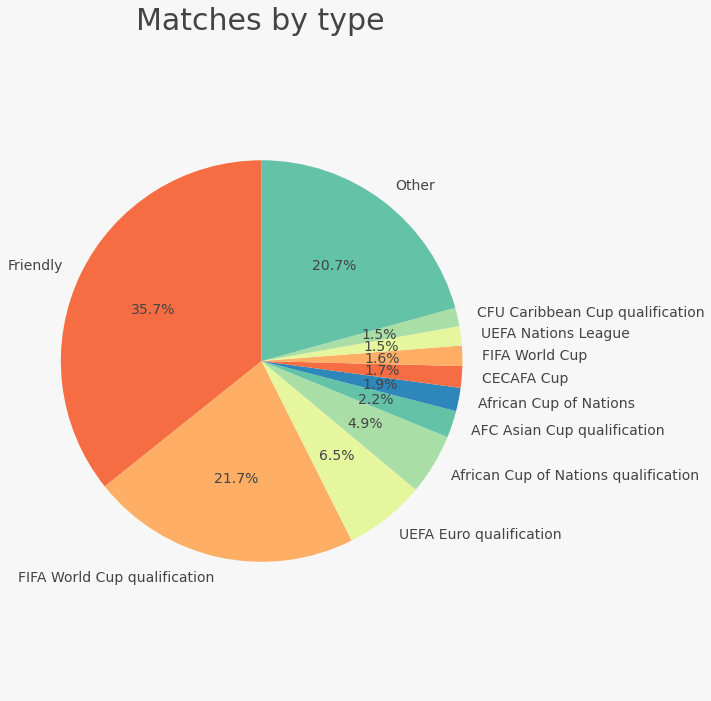

In [7]:
colors = ["#F66D44","#FEAE65", "#E6F69D", "#AADEA7", "#64C2A6", "#2D87BB"]
by_tournament = df.groupby(['tournament']).size()
by_tournament = by_tournament.sort_values(ascending=False)
others = by_tournament[10:]
by_tournament = by_tournament[:10]
by_tournament['Other'] = np.sum(others)
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(by_tournament, labels=by_tournament.keys(), autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_ylabel("")
ax.set_xlabel("Matches by type" ,fontsize=30)
ax.xaxis.set_label_position('top')
ax.autopct='%1.1f%%'
ax.axis('equal') 
plt.tight_layout()
plt.show()

As I expected most games played are friendlies, and after that are FIFA World Cup qualifiers since there are over 200 teams that try to qualify for the world cup. 
I was surprised to see the number of UEFA Nations League matches to be so close to the number of World Cup matches since the Nation's League has only been around for 3 years, but I guess the number of matches really adds up since it's played every eyar as opposed to the world cup every 4 years and since the 2020 world cup has been moved to end of 2021.

Next I want to see which teams are the most successful in terms of total games and percentage of games played won.

In [8]:
wins = df.groupby(['winner']).size()

home = df.groupby(['home_team']).size()
away = df.groupby(['away_team']).size()
total = home + away
percentage_one = wins/total
print(percentage_one.sort_values(ascending=False).head(10), '\n\n')

print(wins.sort_values(ascending=False).head(10))

Andalusia             0.777778
Yorkshire             0.714286
Kernow                0.714286
Spain                 0.695971
Padania               0.674419
Isle of Man           0.666667
County of Nice        0.666667
Parishes of Jersey    0.666667
Jersey                0.653846
Brazil                0.653199
dtype: float64 


winner
Mexico           202
Brazil           194
Spain            190
United States    181
Japan            177
France           175
Germany          173
Iran             170
Saudi Arabia     163
South Korea      158
dtype: int64


The total number of wins is biased because without context that number is meaningless. The percentage one is currently flawed since some teams only have a high percentage since they have played very few games

In [9]:
few_games_played_countries = list(total.sort_values(ascending=True)[:200].keys())
good_wins = df.drop(df[df.tournament == "Friendly"].index)
good_wins = good_wins[~good_wins['home_team'].isin(few_games_played_countries)]
good_wins = good_wins[~good_wins['away_team'].isin(few_games_played_countries)]

wins = good_wins.groupby(['winner']).size()
home = good_wins.groupby(['home_team']).size()
away = good_wins.groupby(['away_team']).size()
new_total = home + away
percentage_one = wins/new_total
print(percentage_one.sort_values(ascending=False).head(10), '\n\n')

winner
Spain            0.626168
Germany          0.616667
Brazil           0.602649
Netherlands      0.587629
Egypt            0.580000
Argentina        0.571429
Portugal         0.558333
France           0.545455
United States    0.537415
Belgium          0.536585
dtype: float64 




This list makes more sense as we see the big teams like Brazil, Spain and France but we still have outliers like Egypt and the US since they tend to play much worse teams in qualifiers which make up a lot of the games. If we want a list of the true top teams we should probably only consider the top tournament (The World Cup)

In [10]:
good_wins = good_wins.drop(good_wins[good_wins.tournament != 'FIFA World Cup'].index)
#print(good_wins.loc[good_wins['tournament'] == 'FIFA World Cup'])
wins = good_wins.groupby(['winner']).size()
home = good_wins.groupby(['home_team']).size()
away = good_wins.groupby(['away_team']).size()
new_total = home + away
percentage_one = wins/new_total
print(percentage_one.sort_values(ascending=False).head(10), '\n\n')

Netherlands    0.722222
Germany        0.709677
Brazil         0.689655
Belgium        0.687500
Colombia       0.666667
Spain          0.590909
Turkey         0.571429
Argentina      0.565217
Chile          0.500000
France         0.500000
dtype: float64 




We can say that the above teams have performed the best at the highest level of international football in the last 20 years

Next I would like to look at the number of average goals per game, home and away advantage

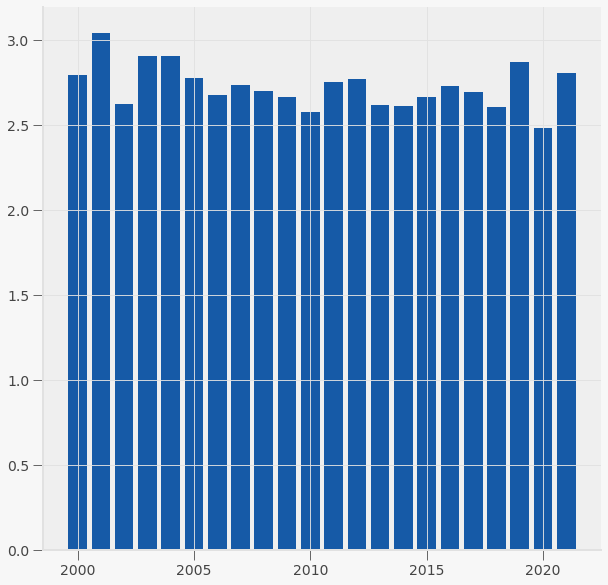

In [11]:
yearly = df.groupby(['date'])
mean_goals_yearly = yearly.agg({'total_goals' : 'mean'})
fig, ax = plt.subplots(figsize=(10,10))
years = list(mean_goals_yearly.index.array)
goals = mean_goals_yearly.loc[:,'total_goals'].values
ax.bar(years,goals)
plt.show()

As we can see the number of goals on average has been pretty consistent from year to year.

Next I wanna see how acccurately we can predict who the winner of a match will be based on prior data. First I will use a basic heuristic that simply chooses the team with the higher percentage of wins then ill try to leverage ML to see if I can do better

In [12]:
no_draws = df.drop(df[df.winner == None].index)
no_draws['winner']

22464              Egypt
22465            Tunisia
22466               None
22467               None
22468               None
              ...       
42079            Hungary
42080            Albania
42081            Armenia
42082    North Macedonia
42083            Iceland
Name: winner, Length: 19620, dtype: object

In [13]:
y = no_draws['winner']
X = no_draws.drop(['winner'], axis=1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(no_draws, y, test_size=0.25)